In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent.parent
DATA_RAW_DIR =  PROJECT_ROOT / "data" / "raw"
DATA_CLEANED_DIR = PROJECT_ROOT / "data" / "cleaned"

data_1m_path = DATA_CLEANED_DIR / 'data_1m.csv'
data_5m_path = DATA_CLEANED_DIR / 'data_5m.csv'
data_15m_path = DATA_CLEANED_DIR / 'data_15m.csv'

df_1m = pd.read_csv(data_1m_path, index_col=0, parse_dates=True)
df_5m = pd.read_csv(data_5m_path, index_col=0, parse_dates=True)
df_15m = pd.read_csv(data_15m_path, index_col=0, parse_dates=True)

df_5m.head()

,requests,bytes,hosts,errors,is_system_down,error_rate,hour_of_day,day_of_week,is_weekend
timestamp,,,,,,,,,
1995-07-01 00:00:00-04:00,301,5277675,60,1,0,0.003322,0,5,True
1995-07-01 00:05:00-04:00,267,5041043,53,0,0,0.000000,0,5,True
1995-07-01 00:10:00-04:00,242,6111846,55,4,0,0.016529,0,5,True
1995-07-01 00:15:00-04:00,282,4559748,55,4,0,0.014184,0,5,True
1995-07-01 00:20:00-04:00,319,7262385,66,0,0,0.000000,0,5,True


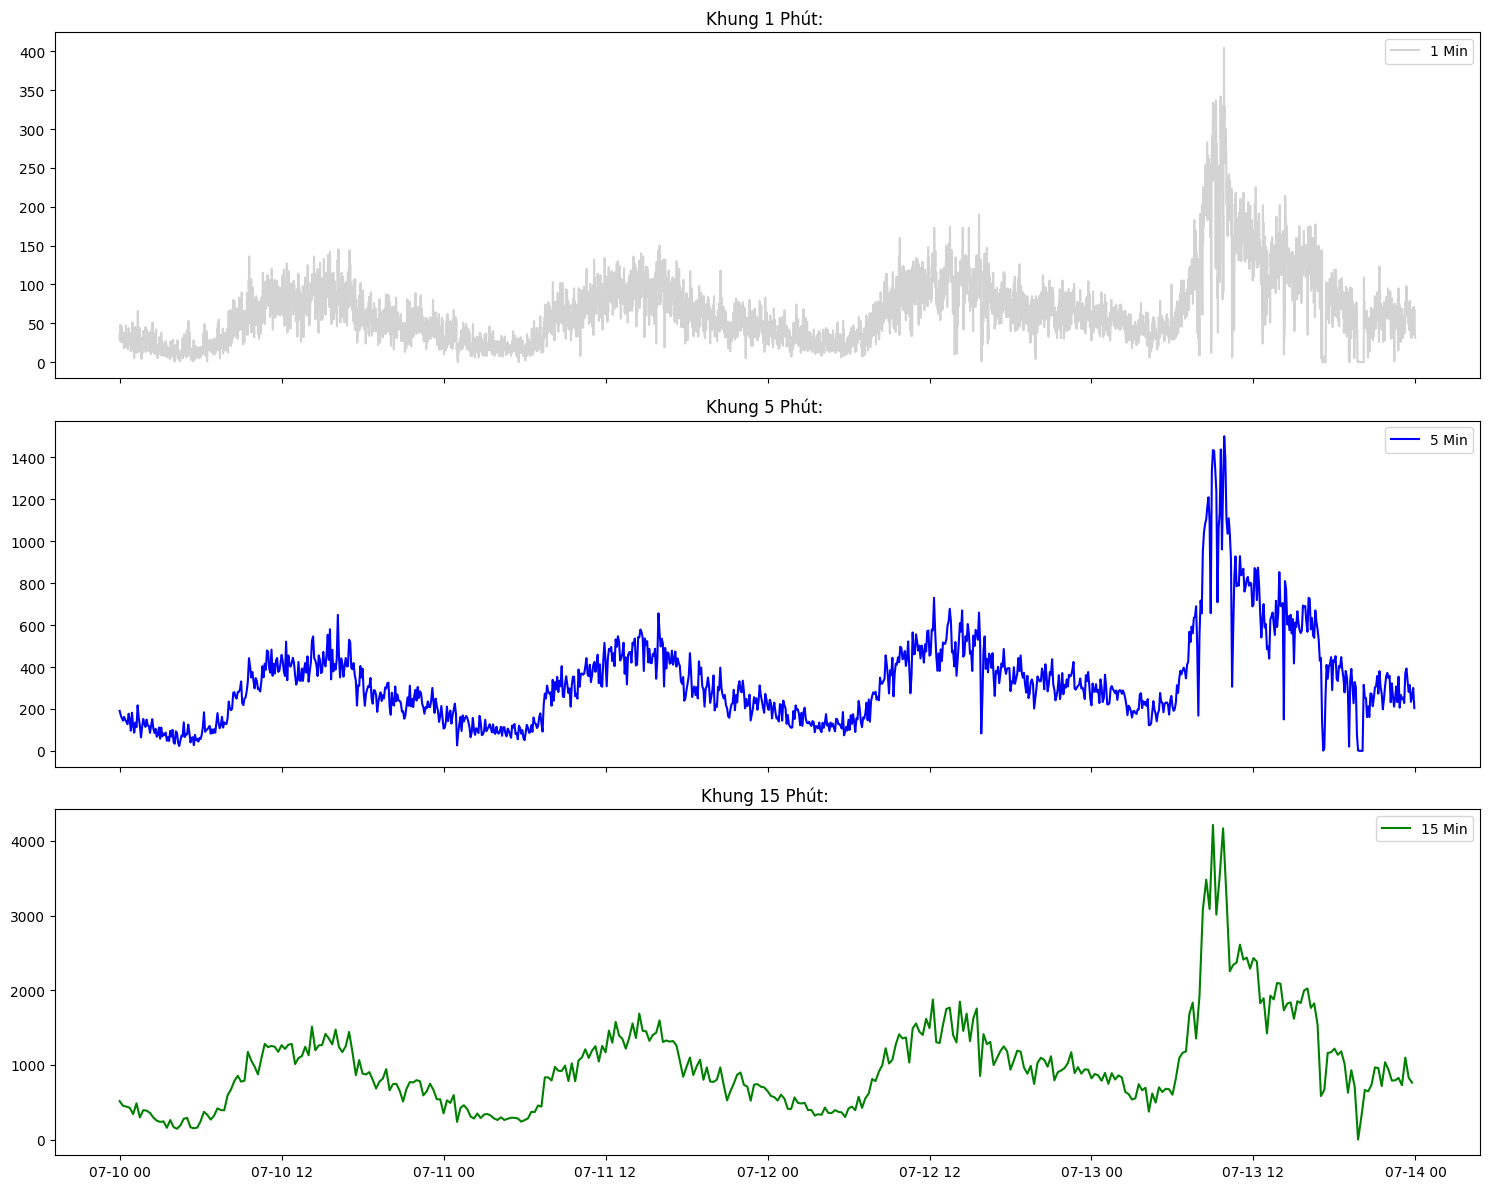

In [5]:
def quick_compare(df_1m, df_5m, df_15m):
  start_zoom = '1995-07-10'
  end_zoom = '1995-07-13'

  fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

  # Plot 1m
  axes[0].plot(df_1m.loc[start_zoom:end_zoom].index, df_1m.loc[start_zoom:end_zoom, 'requests'], color='lightgray', label='1 Min')
  axes[0].set_title('Khung 1 Phút: ')
  axes[0].legend()

  # Plot 5m
  axes[1].plot(df_5m.loc[start_zoom:end_zoom].index, df_5m.loc[start_zoom:end_zoom, 'requests'], color='blue', label='5 Min')
  axes[1].set_title('Khung 5 Phút: ')
  axes[1].legend()

  # Plot 15m
  axes[2].plot(df_15m.loc[start_zoom:end_zoom].index, df_15m.loc[start_zoom:end_zoom, 'requests'], color='green', label='15 Min')
  axes[2].set_title('Khung 15 Phút: ')
  axes[2].legend()

  plt.tight_layout()
  plt.show()

quick_compare(df_1m=df_1m, df_5m= df_5m, df_15m= df_15m)

C:\Users\admin\AppData\Local\Temp\ipykernel_26840\645464236.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hour_of_day', y='requests', ax=axes[0], palette="viridis")
C:\Users\admin\AppData\Local\Temp\ipykernel_26840\645464236.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_of_week', y='requests', ax=axes[1], palette="magma")
C:\Users\admin\AppData\Local\Temp\ipykernel_26840\645464236.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


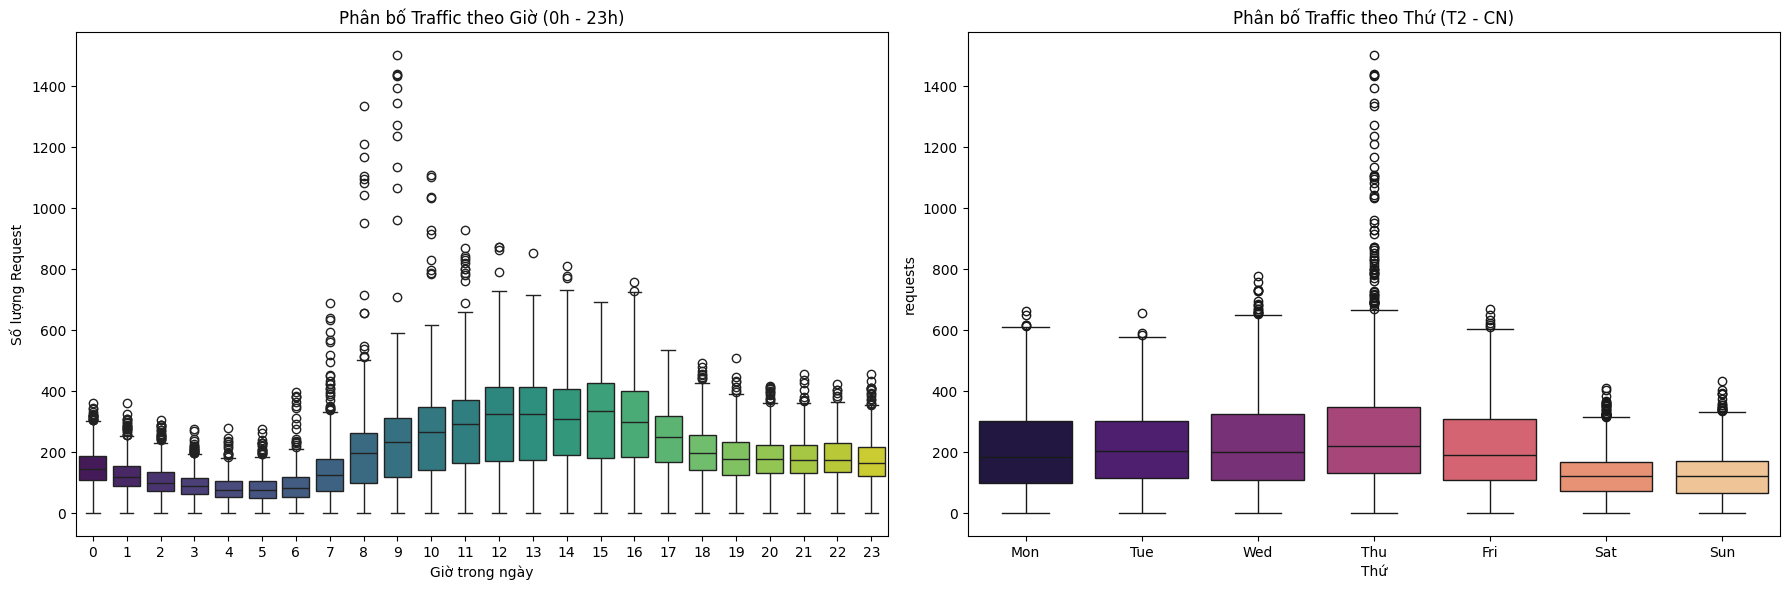

In [8]:
def eda_by_seasonality(df):
  fig, axes = plt.subplots(1, 2, figsize=(18, 6))

  # 1. Boxplot theo Giờ trong ngày 
  sns.boxplot(data=df, x='hour_of_day', y='requests', ax=axes[0], palette="viridis")
  axes[0].set_title('Phân bố Traffic theo Giờ (0h - 23h)')
  axes[0].set_xlabel('Giờ trong ngày')
  axes[0].set_ylabel('Số lượng Request')

  # 2. Boxplot theo Thứ trong tuần 
  sns.boxplot(data=df, x='day_of_week', y='requests', ax=axes[1], palette="magma")
  axes[1].set_title('Phân bố Traffic theo Thứ (T2 - CN)')
  axes[1].set_xlabel('Thứ')
  axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

  plt.tight_layout()
  plt.show()

eda_by_seasonality(df_5m)

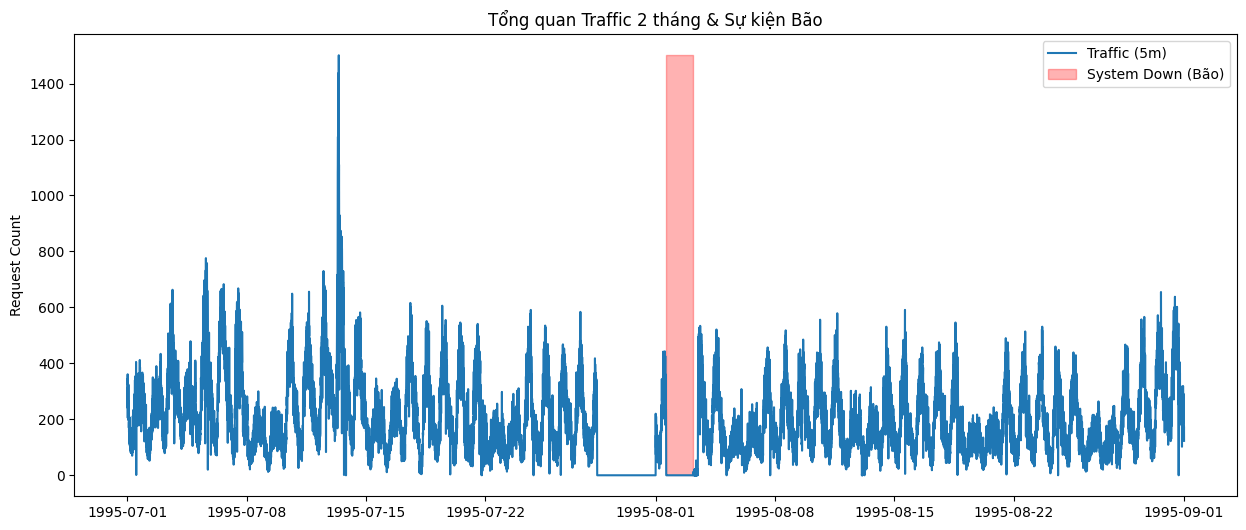

In [10]:
plt.figure(figsize=(15, 6))

# Vẽ đường traffic
plt.plot(df_5m.index, df_5m['requests'], label='Traffic (5m)', color='#1f77b4')

# Highlight vùng Bão (nếu cột is_system_down tồn tại)
if 'is_system_down' in df_5m.columns:
    # Lấy ra các điểm system down = 1
    down_mask = df_5m['is_system_down'] == 1
    # Chỉ vẽ nếu có dữ liệu
    if down_mask.sum() > 0:
        # Tô màu vùng bão
        plt.fill_between(df_5m.index, 0, df_5m['requests'].max(), 
                         where=down_mask, color='red', alpha=0.3, label='System Down (Bão)')

plt.title('Tổng quan Traffic 2 tháng & Sự kiện Bão')
plt.ylabel('Request Count')
plt.legend()
plt.show()